<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/Homework6_problem3(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170M/170M [00:03<00:00, 47.7MB/s]


Starting Training...

Epoch [1/20]
  Training Time: 21.51 sec
  Training Loss: 1.6488 | Training Acc: 0.42%
  Validation Loss: 1.4991 | Validation Acc: 0.48%

Epoch [2/20]
  Training Time: 21.10 sec
  Training Loss: 1.4414 | Training Acc: 0.50%
  Validation Loss: 1.4642 | Validation Acc: 0.49%

Epoch [3/20]
  Training Time: 20.93 sec
  Training Loss: 1.3494 | Training Acc: 0.53%
  Validation Loss: 1.4452 | Validation Acc: 0.50%

Epoch [4/20]
  Training Time: 22.29 sec
  Training Loss: 1.2797 | Training Acc: 0.56%
  Validation Loss: 1.4744 | Validation Acc: 0.50%

Epoch [5/20]
  Training Time: 21.32 sec
  Training Loss: 1.2111 | Training Acc: 0.58%
  Validation Loss: 1.4052 | Validation Acc: 0.52%

Epoch [6/20]
  Training Time: 20.44 sec
  Training Loss: 1.1507 | Training Acc: 0.60%
  Validation Loss: 1.4332 | Validation Acc: 0.53%

Epoch [7/20]
  Training Time: 21.56 sec
  Training Loss: 1.0916 | Training Acc: 0.63%
  Validation Loss: 1.4202 | Validation Acc: 0.52%

Epoch [8/20]
  Trai

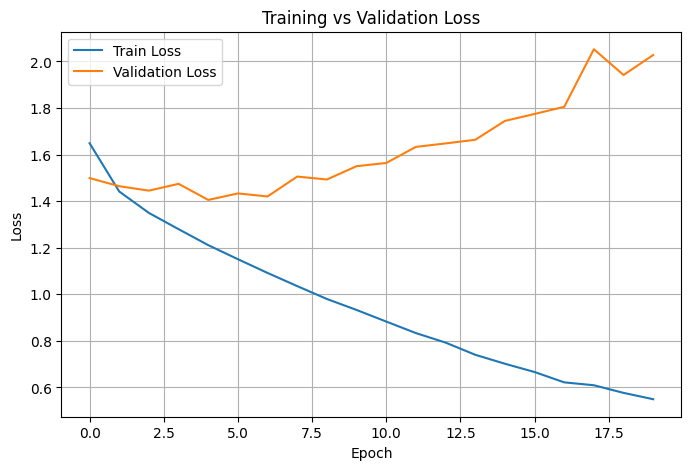

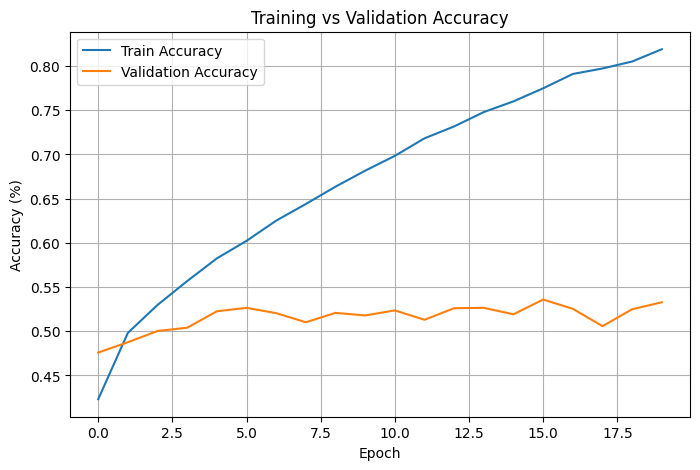

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt

# ----------------------------
# 1. Load CIFAR-10 Dataset
# ----------------------------

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

# ----------------------------
# 2. Define Fully Connected Model
# ----------------------------

class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FCNN().to(device)

# ----------------------------
# 3. Loss and Optimizer
# ----------------------------

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ----------------------------
# 4. Evaluation Function (Loss + Accuracy)
# ----------------------------

def evaluate(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            loss = criterion(outputs, labels)
            total_loss += loss.item() * labels.size(0)

            _, predicted = outputs.max(1)
            total_correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / total
    accuracy = total_correct / total
    return avg_loss, accuracy

# ----------------------------
# 5. Training Loop
# ----------------------------

num_epochs = 20

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

print("Starting Training...\n")

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    start_time = time.time()

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * labels.size(0)

        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    # Training epoch results
    train_loss = running_loss / total
    train_acc =  correct / total

    # Validation results
    val_loss, val_acc = evaluate(model, testloader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    end_time = time.time()

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Training Time: {end_time - start_time:.2f} sec")
    print(f"  Training Loss: {train_loss:.4f} | Training Acc: {train_acc:.2f}%")
    print(f"  Validation Loss: {val_loss:.4f} | Validation Acc: {val_acc:.2f}%\n")

# ----------------------------
# 6. Plot Loss Curve
# ----------------------------

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 7. Plot Accuracy Curve
# ----------------------------

plt.figure(figsize=(8,5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()